In [138]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [141]:
# load and view data
data = pd.read_csv('application_record-Copy1.csv')
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [142]:
# investigate rows with null values
data[data.isnull().any(axis=1)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [143]:
data2 = data.drop(columns=["OCCUPATION_TYPE", "FLAG_PHONE", "FLAG_EMAIL"])
data2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1.0


In [144]:
data2.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [145]:
data2.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [146]:
data2.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
CNT_FAM_MEMBERS        float64
dtype: object

In [147]:
cc_data = pd.read_csv('CRUpdate2.csv')
print(f"Shape of the data is: {data.shape}")
cc_data.head()

Shape of the data is: (438557, 18)


,Unnamed: 0,ID,0,1,2,3,4,5,6,7,...,53,54,55,56,57,58,59,60,SUM,APPROVAL
0,0,5001711,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,YES
1,1,5001712,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,NO
2,2,5001713,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES
3,3,5001714,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES
4,4,5001715,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES


In [148]:
data2.merge(cc_data, how='inner', on='ID')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,53,54,55,56,57,58,59,60,SUM,APPROVAL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,3,YES
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,3,YES
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,7,NO
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,2,YES
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,23,NO
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,0,0,0,0,0,0,0,0,72,NO
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,0,0,0,0,0,0,0,72,NO
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,13,NO


In [149]:
data2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1.0


In [150]:
data2.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
CNT_FAM_MEMBERS        float64
dtype: object

In [151]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['ID', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE']
stringFeatures = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                  'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
floatFeatures = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']

for f in data2:
    if f in intFeatures:
        data2[f] = data2[f].fillna(defaultInt)
    elif f in stringFeatures:
        data2[f] = data2[f].fillna(defaultString)
    elif f in floatFeatures:
        data2[f] = data2[f].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % f)
data2.head(5)   

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1.0


In [152]:
#Encoding data
from sklearn import preprocessing


labelDict = {}
for feature in data2:
    le = preprocessing.LabelEncoder()
    le.fit(data2[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data2[feature] = le.transform(data2[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

data2.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,CNT_FAM_MEMBERS
0,0,1,1,1,0,765,4,1,0,4,12473,4905,0,1,1
1,1,1,1,1,0,765,4,1,0,4,12473,4905,0,1,1
2,2,1,1,1,0,304,4,4,1,1,3040,8298,0,0,1
3,3,0,0,1,0,653,0,4,3,1,5386,6381,0,0,0
4,4,0,0,1,0,653,0,4,3,1,5386,6381,0,0,0


In [154]:
data2.shape

(438557, 15)

In [155]:
import seaborn as sns

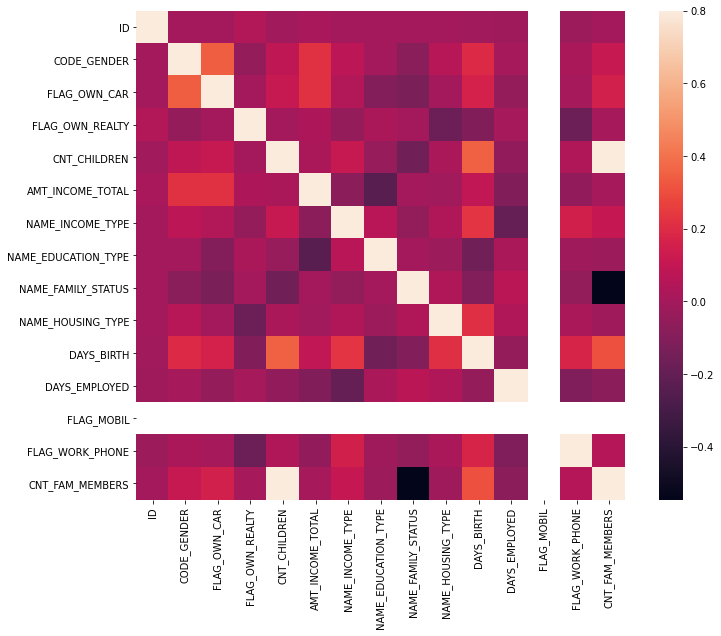

KeyError: 'treatment'

In [156]:
#correlation matrix
corrmat = data2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()




#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [157]:
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [158]:
scaler = MinMaxScaler()
data2['CODE_GENDER'] = scaler.fit_transform(data2[['CODE_GENDER']])
data2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,CNT_FAM_MEMBERS
0,0,1.0,1,1,0,765,4,1,0,4,12473,4905,0,1,1
1,1,1.0,1,1,0,765,4,1,0,4,12473,4905,0,1,1
2,2,1.0,1,1,0,304,4,4,1,1,3040,8298,0,0,1
3,3,0.0,0,1,0,653,0,4,3,1,5386,6381,0,0,0
4,4,0.0,0,1,0,653,0,4,3,1,5386,6381,0,0,0


In [159]:
# Assign X (data) and y(target)
X = data2.drop("FLAG_OWN_REALTY", axis=1)
y = data2["FLAG_OWN_REALTY"]
print(X.shape, y.shape)

(438557, 14) (438557,)


In [160]:
# Split our data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [161]:
X_train.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,CNT_FAM_MEMBERS
41592,129934,0.0,1,1,624,0,1,0,1,9140,8423,0,0,2
299894,268198,0.0,0,0,560,1,1,3,1,2294,9405,0,0,0
243255,213277,0.0,1,0,597,4,1,1,1,8718,7968,0,1,1
187586,166677,1.0,0,0,382,0,4,1,1,6923,4766,0,1,1
24358,17875,0.0,0,0,382,0,4,1,1,6299,517,0,0,1


In [162]:
# Create a logistic Regression Model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [163]:
# Fit model using the training data
classifier.fit(X_train, y_train)

LogisticRegression()

In [164]:
# evaluate the model's performance using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6932143975531821
Testing Data Score: 0.6931229478292594


In [165]:
# Make predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 0, 1, 1, 1, 1, 0, 1, 1, 1]


In [166]:
# View predictions along with their probabilities of being within each class 
##  this will be the difficult part of our project because data is not binary like example: male/female
probs = classifier.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(FEMALE)": [p[0] for p in probs], 
    "P(MALE)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(FEMALE),P(MALE)
0,1,1,0.285104,0.714896
1,1,0,0.296748,0.703252
2,1,1,0.441023,0.558977
3,1,1,0.182382,0.817618
4,1,1,0.276272,0.723728
5,1,1,0.304624,0.695376
6,1,0,0.277147,0.722853
7,1,1,0.265656,0.734344
8,1,1,0.392463,0.607537
9,1,1,0.210812,0.789188


In [167]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[   84, 33537],
       [  109, 75910]])

In [168]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 84   False Pos: 33537
False Neg: 109  True Pos: 75910


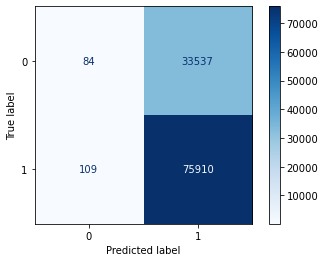

In [169]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

In [170]:
# Precision and Recall
### we don't technically have a "positive" label, like we would if we were classifying emails as Spam, or patients as having cancer. 
## This means that we need to tell our precision and recall functions which class label we want to consider to be our "positive" class i.e. which lender
from sklearn.metrics import precision_score, recall_score, f1_score

In [171]:
## Random tests of lenders first test is YES, the lender with the most loans
precision_score(y_test, predictions, pos_label=0)

0.43523316062176165

In [172]:
## Random tests of lenders second test is NO, random test of lender with lower loan count of 10 loans
precision_score(y_test, predictions, pos_label=1)

0.6935777134137985

In [173]:
#  what is the harmonic mean of YES Texas from first test
f1_score(y_test, predictions, pos_label=0)

0.00496835630212338

In [174]:
#  what is the harmonic mean of NO from second test
f1_score(y_test, predictions, pos_label=1)

0.8185866951354965